<a href="https://colab.research.google.com/github/andremarinho17/data_projects/blob/master/Analisando_Dados_do_Gmail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Dados do Gmail

Todos os dias recebemos uma grande quantidade de e-mails que nos trazem variados tipos de informações em diversos formatos. Mas como organizar, entender e trabalhar com todos esses dados disponíveis?

<center><img width="50%" src="https://image.freepik.com/free-vector/mail-sent-concept-illustration_114360-168.jpg"></center>

Neste projeto, irei acessar, baixar, limpar e analisar os dados do meu gmail.

Antes de começar o projeto em si, é necessário acessar o Gmail e importar os dados por meio do Google Takeout. Feita a importação, basta subir o arquivo zip para o notebook e usá-lo.

In [1]:
# importação dos pacotes necessários 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import mailbox
import re
import pytz
import seaborn as sns

## Carregando os Dados

Feita a importação do arquivo .zip, é necessário descompacta-lo através do unzip.

In [2]:
!unzip /content/takeout-20210420T131211Z-001.zip

Archive:  /content/takeout-20210420T131211Z-001.zip
  inflating: Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox  
  inflating: Takeout/navegador_arquivo.html  


Feita a descompactação, irei carregar os dados do meu e-mail por meio da biblioteca `mailbox`, haja vista que o arquivo é do tipo `mbox`.

In [3]:
mbox = mailbox.mbox('/content/Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox')

mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'DKIM-Signature',
 'Received',
 'Received',
 'Content-Type',
 'Date',
 'From',
 'Mime-Version',
 'Message-ID',
 'Subject',
 'X-Feedback-ID',
 'X-SG-EID',
 'X-SG-ID',
 'To',
 'X-Entity-ID',
 'List-Unsubscribe']

Agora, é necessário transformar o arquivo do tipo mbox para um dataframe, pois assim fica mais fácil a manipulação dos dados através da biblioteca `pandas`. Para isso, vou criar um dicionário, onde as chaves são as informações que quero puxar, e os valores serão as entradas de cada e-mail, para cada variável de interesse. Em seguida vou convertê-lo em um dataframe.

In [4]:
# criação do dicionário com os dados do mbox

email_dict = {
    'date': [],
    'from': [],
    'to': [],
    'subject': [],
    'labels': []
}

for message in mbox:
  email_dict['date'].append(message['date'])
  email_dict['from'].append(message['from'])
  email_dict['to'].append(message['to'])
  email_dict['subject'].append(message['subject'])
  email_dict['labels'].append(message['X-Gmail-Labels'])

In [5]:
# conversão para o dataframe
df = pd.DataFrame(email_dict)

In [7]:
# verificação das cinco primeiras entradas.
df.head()

,date,from,to,subject,labels
0,"Mon, 12 Apr 2021 22:30:26 +0000 (UTC)",=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,LIVE: Como monetizar a carreira de roteirista.,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
1,"Tue, 06 Apr 2021 11:11:15 -0600","""Microsoft Bing"" <hello@email3.bing.com>",<andremarinhom17@gmail.com>,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
2,"Tue, 13 Apr 2021 15:02:24 +0000 (UTC)",=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,Aulas =?UTF-8?B?R3LDoXRpcw==?= da Semana do Ro...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
3,"Wed, 07 Apr 2021 22:30:52 +0000 (UTC)",=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,Live - Os =?UTF-8?B?dHLDqnM=?= tipos de narrat...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
4,"Sun, 4 Apr 2021 02:15:08 -0700","""Facebook"" <notification@facebookmail.com>",Andre Marinho <andremarinhom17@gmail.com>,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."


In [8]:
# verificação dos tipos
df.dtypes

date       object
from       object
to         object
subject    object
labels     object
dtype: object

Ao verificar o tipo das variáveis, é possível perceber que é preciso trabalhar na coluna `date`. Essa coluna tem uma informação importante para a análise que é a data, mas está no formato `object`.

Portanto, vou converter para o formato `datetime`. Entretanto, essa coluna traz informações de TimeZone e é preciso passar o parâmetro `utc=True`, para que a conversão possa ser feita corretamente.

In [10]:
df = df[df['date'] != "Sun, 14 Feb 2021 17:42:00 -0300 (GMT-03:00)"]

In [11]:
df['date'] = pd.to_datetime(df['date'], utc=True)

In [12]:
df.head()

,date,from,to,subject,labels
0,2021-04-12 22:30:26+00:00,=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,LIVE: Como monetizar a carreira de roteirista.,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
1,2021-04-06 17:11:15+00:00,"""Microsoft Bing"" <hello@email3.bing.com>",<andremarinhom17@gmail.com>,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
2,2021-04-13 15:02:24+00:00,=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,Aulas =?UTF-8?B?R3LDoXRpcw==?= da Semana do Ro...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
3,2021-04-07 22:30:52+00:00,=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,Live - Os =?UTF-8?B?dHLDqnM=?= tipos de narrat...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
4,2021-04-04 09:15:08+00:00,"""Facebook"" <notification@facebookmail.com>",Andre Marinho <andremarinhom17@gmail.com>,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."


Ainda é necessário converter a data para o timezone em que estou localizado. Para isso, vou aplicar uma função lambda com o uso do método timezone da biblioteca `pytz`.

In [13]:
df['date'] = df['date'].apply(lambda x: x.astimezone(pytz.timezone("America/Sao_Paulo")))

In [14]:
df.head()

,date,from,to,subject,labels
0,2021-04-12 19:30:26-03:00,=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,LIVE: Como monetizar a carreira de roteirista.,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
1,2021-04-06 14:11:15-03:00,"""Microsoft Bing"" <hello@email3.bing.com>",<andremarinhom17@gmail.com>,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
2,2021-04-13 12:02:24-03:00,=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,Aulas =?UTF-8?B?R3LDoXRpcw==?= da Semana do Ro...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
3,2021-04-07 19:30:52-03:00,=?utf-8?q?Bea_G=C3=B3es?= <contato@narratologi...,andremarinhom17@gmail.com,Live - Os =?UTF-8?B?dHLDqnM=?= tipos de narrat...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
4,2021-04-04 06:15:08-03:00,"""Facebook"" <notification@facebookmail.com>",Andre Marinho <andremarinhom17@gmail.com>,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."


Com os dados nos formatos e tipos necessários, vou continuar a limpeza de dados.

Abaixo, vou conferir a quantidade de dados faltantes.

In [15]:
df.isnull().sum()

date       0
from       0
to         0
subject    0
labels     0
dtype: int64

Não há valores ausentes, então prossigamos com a limpeza!

In [16]:
df = df[df['from'].str.contains('utf-8') == False]

## Limpeza de String

Ao verificar os dados acima, consigo perceber que há entradas bem confusas e que são importantes para as análises. Por isso, é importante fazer a limpeza dessas entradas por meio da manipulação de strings.

<center><img width="50%" src="https://image.freepik.com/free-photo/housekeeping-concept-with-hand-holding-cloth_23-2147699396.jpg"></center>

A primeira coisa que irei fazer é limpar os e-mails, tanto de emissor e receptor, removendo tudo aquilo que não faz parte do endereço de e-mail.

In [17]:
# criando a função
def extrair_email(string_email):
    email = re.findall(r'<(.+?)>', string_email)
    if email:
        return email[0]
    else:
        return string_email

In [18]:
# aplicando a função

df['to'] = df['to'].apply(extrair_email)
df['from'] = df['from'].apply(extrair_email)

In [19]:
# verificando os resultados
df.head()

,date,from,to,subject,labels
1,2021-04-06 14:11:15-03:00,hello@email3.bing.com,andremarinhom17@gmail.com,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
4,2021-04-04 06:15:08-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."
5,2021-03-26 21:19:18-03:00,info@twitter.com,andremarinhom17@gmail.com,=?UTF-8?Q?Let=C3=ADcia_Alves_em_=F0=9F=8F=A1_c...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."
6,2021-04-16 10:13:48-03:00,robot@letterboxd.com,andremarinhom17@gmail.com,Letterboxd Rushes for humor,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
8,2021-03-31 06:38:46-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBHYWJyaWVsbGUgTnVu?=\r\n =?UTF...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."


Agora, irei fazer um processo parecido para a coluna label, extraindo apenas o primeiro item, que é o mais importante para a análise.

In [20]:
# criando a função
def extrair_label(string_labels):
  return string_labels.replace("=?UTF-8?Q?", "").split(",")[0]

In [21]:
# aplicando a função
df["labels"] = df["labels"].apply(extrair_label)

In [22]:
# verificando os resultados
df.head()

,date,from,to,subject,labels
1,2021-04-06 14:11:15-03:00,hello@email3.bing.com,andremarinhom17@gmail.com,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,Caixa_de_entrada
4,2021-04-04 06:15:08-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,Caixa_de_entrada
5,2021-03-26 21:19:18-03:00,info@twitter.com,andremarinhom17@gmail.com,=?UTF-8?Q?Let=C3=ADcia_Alves_em_=F0=9F=8F=A1_c...,Caixa_de_entrada
6,2021-04-16 10:13:48-03:00,robot@letterboxd.com,andremarinhom17@gmail.com,Letterboxd Rushes for humor,Caixa_de_entrada
8,2021-03-31 06:38:46-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBHYWJyaWVsbGUgTnVu?=\r\n =?UTF...,Caixa_de_entrada


## Análise Exploratória

Agora que os dados foram adquiridos, carregado e limpos, eles estão prontos para serem analisados!

<center><img width="50%" src="https://image.freepik.com/free-photo/business-presentation-laptop-screen_53876-13516.jpg"></center>

A parte que mais demanda tempo e atenção é a análise exploratória, pois é a partir dela que é possível transformar os dados em informação e encontrar conhecimento relevante para a análise.

A primeira análise que farei é em relação aos emails que me enviam. 

###Qual foi o endereço que mais me enviou e-mails?

In [23]:
df[df['labels'] == "Caixa_de_entrada"]["from"].value_counts()[0:5]

notification+kr4mwbrybkax@facebookmail.com          4168
notification@facebookmail.com                       1611
update+kr4mwbrybkax@facebookmail.com                1454
info@twitter.com                                     449
notification+kr4mwbrybkax@pages.facebookmail.com     187
Name: from, dtype: int64

De acordo com os dados, recebo mais emails de notificações do Facebook, seguido do Twitter.

Outro insight interessante é descobrir que dia da semana a recebo mais e-mail.


### Qual dia da semana recebo mais e-mails?

Usando Python e Pandas, vou criar uma nova coluna, que indica em que dia da semana cada e-mail foi enviado.

In [24]:
df.head()

,date,from,to,subject,labels
1,2021-04-06 14:11:15-03:00,hello@email3.bing.com,andremarinhom17@gmail.com,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,Caixa_de_entrada
4,2021-04-04 06:15:08-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,Caixa_de_entrada
5,2021-03-26 21:19:18-03:00,info@twitter.com,andremarinhom17@gmail.com,=?UTF-8?Q?Let=C3=ADcia_Alves_em_=F0=9F=8F=A1_c...,Caixa_de_entrada
6,2021-04-16 10:13:48-03:00,robot@letterboxd.com,andremarinhom17@gmail.com,Letterboxd Rushes for humor,Caixa_de_entrada
8,2021-03-31 06:38:46-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBHYWJyaWVsbGUgTnVu?=\r\n =?UTF...,Caixa_de_entrada


In [25]:
# criando a variável para o dia da semana
df["weekday"] = df["date"].dt.weekday

In [26]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday
1,2021-04-06 14:11:15-03:00,hello@email3.bing.com,andremarinhom17@gmail.com,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,Caixa_de_entrada,1
4,2021-04-04 06:15:08-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,Caixa_de_entrada,6
5,2021-03-26 21:19:18-03:00,info@twitter.com,andremarinhom17@gmail.com,=?UTF-8?Q?Let=C3=ADcia_Alves_em_=F0=9F=8F=A1_c...,Caixa_de_entrada,4
6,2021-04-16 10:13:48-03:00,robot@letterboxd.com,andremarinhom17@gmail.com,Letterboxd Rushes for humor,Caixa_de_entrada,4
8,2021-03-31 06:38:46-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBHYWJyaWVsbGUgTnVu?=\r\n =?UTF...,Caixa_de_entrada,2


Com a coluna criada, vou transformar esses números em uma informação mais fácil de digerir e interpretar.

A transformação que fiz retorna Segunda-Feira como o primeiro dia, portanto, o dia associado ao valor `0`, é Segunda-Feira, e assim sucessivamente.

Vou criar um dicionário, onde associarei para as chaves, valores em formato de string para os dias da semana, e transformar a coluna com esse dicionário.

In [27]:
# criando dicionário
dias_semana = {0:"Segunda", 1:"Terça", 2:"Quarta", 3:"Quinta", 4:"Sexta", 5:"Sábado", 6:"Domingo"}

# transformando a coluna
df['weekday'] = df['weekday'].replace(dias_semana)

In [28]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday
1,2021-04-06 14:11:15-03:00,hello@email3.bing.com,andremarinhom17@gmail.com,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,Caixa_de_entrada,Terça
4,2021-04-04 06:15:08-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,Caixa_de_entrada,Domingo
5,2021-03-26 21:19:18-03:00,info@twitter.com,andremarinhom17@gmail.com,=?UTF-8?Q?Let=C3=ADcia_Alves_em_=F0=9F=8F=A1_c...,Caixa_de_entrada,Sexta
6,2021-04-16 10:13:48-03:00,robot@letterboxd.com,andremarinhom17@gmail.com,Letterboxd Rushes for humor,Caixa_de_entrada,Sexta
8,2021-03-31 06:38:46-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBHYWJyaWVsbGUgTnVu?=\r\n =?UTF...,Caixa_de_entrada,Quarta


Agora que tenho todas as informações necessárias, posso usar a biblioteca `seaborn` para plotar um `countplot` e mostrar em qual dia da semana recebemo mais e-mails.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


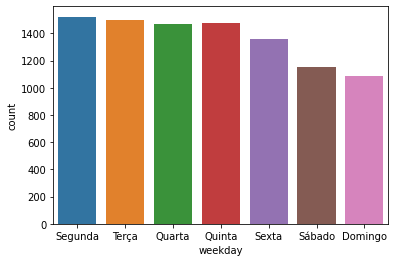

In [29]:
# plotando o countplot
sns.countplot(df["weekday"], order=["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"])

A **Segunda-Feira** traz um volume maior de e-mails, um pouco menor do que os demais dias da semana. Este volume cai gradativamente ao longo da semana. Mas qual será o horário que mais recebo e-mails?

Posso fazer um processo parecido com o que fiz de dias da semana para criar uma variável que me indica a hora em que o e-mail foi recebido.

Assim, consigo fazer uma análise semelhante à que fiz sobre os dias.

In [30]:
# coletando as horas
df["hora"] = df["date"].dt.hour

In [31]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday,hora
1,2021-04-06 14:11:15-03:00,hello@email3.bing.com,andremarinhom17@gmail.com,=?UTF-8?Q?Tend=C3=AAncias_nas_not=C3=ADcias:_v...,Caixa_de_entrada,Terça,14
4,2021-04-04 06:15:08-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBNYXRoZXVzIEp1bmlv?=\r\n =?UTF...,Caixa_de_entrada,Domingo,6
5,2021-03-26 21:19:18-03:00,info@twitter.com,andremarinhom17@gmail.com,=?UTF-8?Q?Let=C3=ADcia_Alves_em_=F0=9F=8F=A1_c...,Caixa_de_entrada,Sexta,21
6,2021-04-16 10:13:48-03:00,robot@letterboxd.com,andremarinhom17@gmail.com,Letterboxd Rushes for humor,Caixa_de_entrada,Sexta,10
8,2021-03-31 06:38:46-03:00,notification@facebookmail.com,andremarinhom17@gmail.com,=?UTF-8?B?8J+OgiBHYWJyaWVsbGUgTnVu?=\r\n =?UTF...,Caixa_de_entrada,Quarta,6


Pronto! Agora basta plotar um countplot, como feito anteriormente.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


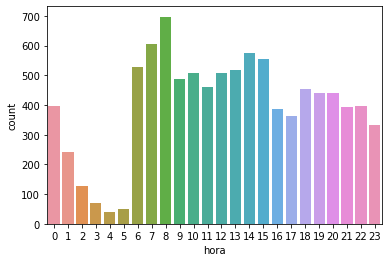

In [34]:
sns.countplot(df["hora"])

De acordo com o gráfico acima, observa-se que o horário que mais recebo é 7 horas da manhã. O intervalo começa às 6 da manhã e se mantem estável até às 15, quando começa a cair. 

In [ ]:
#Exportando para excel

df['date'] = df['date'].apply(lambda x: pd.to_datetime(x).date())


In [ ]:
df.to_excel("meu_gmail.xlsx", index=False)

## Conclusões e Desafios Futuros

Este projeto se fez de extrema importância para analisar os dados do Gmail e obter informações relevantes sobre o comportamento deste. Fica como desafios futuros analisar comportamentos do email com diferentes amostras de diferentes semanas para extrair informações relevantes.

Este projeto pode ser de grande valia para trabalhos que envolvam suporte de empresas, pois assim é interessante traçar padrões e detectar o melhor horário para envio do email.